# Linear Regression

*  Write the training error as least squares criterion for linear regression
* Use stochastic gradient descent for fitting linear regression models
* Solve closed-form linear regression solution
* Identify regularization term and how it changes the solution, generalizatio

Linear Regression problem could be describe formally 
As predicted value is a linear combination of feature vector and data point $ f(x,\theta_1, \theta_0) = \sum_{i=1}^d \theta_i*x_i + \theta_0$ Where $ y \in R $

Our purpose is to minimize the loss function. 

$$ R(\theta) = \frac{1}{n} \sum_{i=1}^n \text{Loss}(y^{(t)} - \theta*x^{(t)}) $$

In case of 

$$ R(\theta) = \frac{1}{n} \sum_{i=1}^n \frac{(y^{(t)} - \theta*x^{(t)})^2}{2} $$

The rationale behind the square is that we allow a small distance from our prediction to the actual data point but pernalize hard when the distance is large.

**Problem**: Calculate the loss value for many loss function
Data point:

$$
x^1, y^1 = [1,0,1]^T 2 \\
x^2, y^2 = [1,1,1]^T 2.7 \\
x^3, y^3 = [1,1,-1]^T -0.7 \\
x^4, y^4 = [-1,1,1]^T 2
$$

Calculate

1. Hinge Loss value
2. Square Loss

In [19]:
import numpy as np

x = np.array([[1,0,1],[1,1,1],[1,1,-1],[-1,1,1]])
y = np.array([2,2.7,-0.7,2])
theta = np.array([0,1,2])

hloss = lambda z: 0 if z >= 1 else 1 - z
vhloss = lambda x: np.vectorize(hloss)(x)

def hingeloss(theta, x, y):
    z = vhloss(y - np.inner(x, theta))
    return np.average(z)
    
def squareloss(theta, x, y):
    return np.average(np.square(y-np.inner(x,theta))/2)

print('Hinge loss = {}'.format(hingeloss(theta,x,y)))
print('Sauare loss = {}'.format(squareloss(theta,x,y)))

Hinge loss = 1.25
Sauare loss = 0.1475


array([0, 0, 2, 0])

### Error decomposition and the bias-variance trade-off

Suppose $\hat{f}$ is an approximation of the true function $f$. Because our observed data might not be 100% accurate as there can be many kinds of noise and uncertainty containing in the data. Thus, we further assume a random noise variable $\epsilon$ is added on top of $y$:

$$ y = f(x) + \epsilon $$

Where $ \epsilon \sim \mathbb{N}(0, \sigma^2) $.

Because different training set gives us different value of noise, we have different estimator $\hat{f}(x)$ for each data set. We define $\mathbb{E}[\hat{f}(x)]$ to be the expected estimator over all possible training sets.

For a new $x$ and unknown $y$, what is the expected prediction error looks like for our estimator given all possible training sets:

\begin{split}
\mathbb{E}[(y - \hat{f}(x))^2] &= \mathbb{E}[(f(x) + \epsilon - \hat{f}(x))^2] \\
 &= (f(x) - \mathbb{E}[\hat{f}(x)])^2 + \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2] + \mathbb{E}[\epsilon^2]
\end{split}

There are 3 terms in this error decomposition:

The first term is the square of the difference between the true $f(x)$ and the expected estimation over all possible training sets. This term is usually called bias and it describes how much the average estimator fitted over all datasets deviates from the underlying true $f(x)$ (Structural mistake).

The second term is the variance of the estimator. It describes on average how much a single estimator deviates from the expected estimator over all data sets (Estimation error).

The third term $\mathbb{E}(\epsilon^2) = \sigma^2$ is the error from the inherent noise of the data and we can do nothing to minimize it. It is called irreducible error. This irreducible error gives a lower bound on the expected prediction error.

The task of supervised learning is to reduce the bias and variance at the same time, but because of the noise in the training data, it is not possible to simultaneously minimize these two sources of errors. This is known as the bias-variance trade-off.

![bias-variance trade-off](https://prod-edxapp.edx-cdn.org/assets/courseware/v1/0317e2874022adc4d1133f49c96cbd35/asset-v1:MITx+6.86x+1T2019+type@asset+block/images_biasvariance.png)

## Gradient Based Approach

\begin{split}
\frac{\bigtriangledown_\theta (y^{(t)} - \theta \cdot x^{(t)})^2}{2} &= (y^{(t)} - \theta \cdot x^{(t)}) * \bigtriangledown_\theta (y^{(t)} - \theta \cdot x^{(t)})  \\
&= - (y^{(t)} - \theta \cdot x^{(t)}) \cdot x^{(t)})
\end{split}

**Algorithm**

- Step 1: Initialize $\theta = 0$
- Step 2: Randomly pick $t = {1,\dots,n}$ and update

$$ \theta = \theta + \eta * (y^{(t)} - \theta \cdot x^{(t)}) \cdot x^{(t)}$$


## Closed Form Solution

Because our loss function is a convex function, we have a closed form solution for it.

We have $\mathbb{R}_n(\theta) = \frac{1}{n} \sum_{t=1}^n (y^{(t)} - \theta \cdot x^{(t)}) / 2 $. By taking the gradient, we have

\begin{split}
\bigtriangledown_\theta \mathbb{R}_n(\theta) &= - \frac{1}{n} \sum_{t=1}^n (y^{(t)} - \theta \cdot x^{(t)}) \cdot x^{(t)} \\
 &= \frac{1}{n} \sum_{t=1}^n y^{(t)} x^{(t)} + \frac{1}{n} \sum_{t=1}^n (\hat{\theta} \cdot x^{(t)}) x^{(t)}
\end{split}

Let $ b = \frac{1}{n} \sum_{t=1}^n y^{(t)} x^{(t)} $ and move the "number" $ \hat{\theta} \cdot x^{(t)} $ to the back, we have the matrix $ \frac{1}{n} \sum_{t=1}^{n} x^{(t)} (x^{(t)})^T \hat{\theta} $

So we have a linear system $ b = A \cdot \hat{\theta} $ and the solution of this system is $ \hat{\theta} = A^{-1} b $


### Ridge Regression

$$ J_{\lambda, n} (\theta) = \frac{\lambda}{2} ||\theta||^2 + R_n(\theta) $$

We want the loss function show us how well we capture the data. We don't want our function to stay too fit to noise. So we add the first item to pull loss function into a range.

This part of loss function forces us to change our $\theta$ update strategy by

$$ \theta = (1 - \eta \lambda) \theta + \eta(y^{(t)} - \theta x^{(t)})x^{(t)} $$

## Vectorization for Speed

In model training or prediction,  we often use vector calculations and process multiple observations at the same time. We benchmark the running time by following Timer code

In [1]:
class Timer:
    """Record multiple running time"""
    def __init__(self):
        self.times = []
        self.start()
        
    def start(self):
        """Start the timer"""
        self.start_time = time.time()
        
    def stop(self):
        """Stop the timer"""
        self.times.append(time.time() - self.start_time)
        return self.times[-1]
    
    def avg(self):
        """Return the average time"""
        return sum(self.times) / len(self.times)
    
    def sum(self):
        return sum(self.times)
    
    def cumsum(self):
        return np.array(self.times).cumsum().tolist()

In [3]:
import math
import numpy as np
from mxnet import nd
import time

n = 100000
a = np.ones(n)
b = np.ones(n)

c = np.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
'%.5f sec' % timer.stop()

'0.06681 sec'

Add vectors directly (vectorization)

In [4]:
timer.start()
c = a + b
'%.5f sec' % timer.stop()

'0.00519 sec'

# Implement of Linear Regression

We will try to implement the linear regression from scratch using a synthetical data to estimate the presion of the model. We will generate 1000 data points and the number of features will be 2. Our synthetic dataset will be the object $X \in \mathbb{R}^{1000 x 2}$. Each data point will be sampled from a Gausian distribution. 

We fix the true value for $w = [2, -3.4]^T$ and $b = 4.2$. Our model to generate data is 

$$ y = Xw + b + \epsilon $$

where $\epsilon$ follows Normal Distribution with mean of 0 and standard deviation of 0.01.

In [11]:
def synthetic_data(w, b, num_examples):
    X = nd.random.normal(scale=1, shape=(num_examples, len(w)))
    y = nd.dot(X, w) + b
    y += nd.random.normal(scale=0.01, shape=y.shape)
    return X, y

true_w = nd.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

features[0], labels[0]

(
 [-1.546639   -0.47990888]
 <NDArray 2 @cpu(0)>, 
 [2.7170494]
 <NDArray 1 @cpu(0)>)

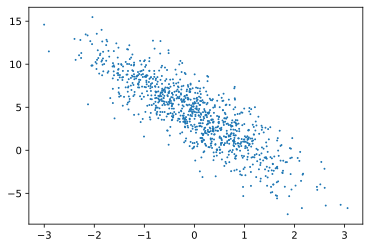

In [26]:
%matplotlib inline

import d2l
import random
from mxnet import nd, autograd

d2l.plt.scatter(features[:,1].asnumpy(), labels.asnumpy(), 1)

In [20]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i : min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-0.27106524  0.62263787]
 [-1.9435536  -1.430922  ]
 [ 1.4389654   1.6659839 ]
 [-0.71800214  1.3168844 ]
 [ 0.3776408  -0.5103999 ]
 [-1.9301482   0.94788367]
 [ 1.1785146  -0.14807335]
 [-0.4039662  -0.7827149 ]
 [ 1.7609563   0.57864124]
 [ 1.4591205  -1.5593898 ]]
<NDArray 10x2 @cpu(0)> 
[ 1.5307784  5.181685   1.4134175 -1.713798   6.673435  -2.890939
  7.0553055  6.0560107  5.7657113 12.420712 ]
<NDArray 10 @cpu(0)>


Before we start optimizing our model parameters by gradient descent, we need to have some parameters in the first place. We initialize weights by sampling random numbers from a normal distribution with mean 0 and a standard deviation of 0.01. Setting the bias $b$ to 0

In [21]:
w = nd.random.normal(scale=0.01, shape=(2,1))
b = nd.zeros(shape=(1,))

Now we need to update the parameters, each update will require taking the gradient of our loss function with respect to the parameters. We will use auto gradient provided by mxnet.

In [23]:
w.attach_grad()
b.attach_grad()

def linreg(X, w, b):
    return nd.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

## Training

We proceed to implement the main training loop.
In each iteration, we will grab minibatches of models, first passing them through our model to obtain a set of predictions, after calculating the loss, we will call *backward* function to backpropagate through the network, storing the gradients with respect to each parameter in its corresponding .grad attribute. Finally, we will call the optimization algorithm sgd to update the model parameters. Since we previously set the batch size **batch_size** to 10, the loss shape l for each small batch is (10, 1)

In summary, we will execute the following loop:

* Initialize parameters $(w, b)$
* Repeat until done
  * Compute gradient $g \leftarrow \delta_{(w,b)}\frac{1}{B} \sum_{i \in B} l(x^i,y^i,w,b)$
  * Update parameters $(w, b) \leftarrow (w, b) - \eta g$

In [29]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X,w,b), y)
        l.backward()
        sgd([w,b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.042552
epoch 2, loss 0.000166
epoch 3, loss 0.000047


In [30]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w 
[ 0.00019157 -0.00053573]
<NDArray 2 @cpu(0)>
Error in estimating b 
[0.00033855]
<NDArray 1 @cpu(0)>


# Linear Regression Implementation with Gluon / MXNet

MXNet has various support libraries to help fasten the process of building neuron network.

* Reading Data: Gluon supports ArrayDataSet and DataLoader to allow iterate through datasets.
* MXNet defines Sequential class to help defines neuron network.
* **initializer** to initialize parameters.
* Various loss functions
* Various Optimization Algorithm

The implementation in the previous section could be re-implemented as followings:

In [33]:
import d2l
from mxnet import autograd, nd, gluon, init
from mxnet.gluon import nn, loss

true_w = nd.array([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

def load_array(data_arrays, batch_size, is_train=True):
    dataset = gluon.data.ArrayDataset(*data_arrays)
    return gluon.data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

net = nn.Sequential()
net.add(nn.Dense(1))
net.initialize(init.Normal(sigma=0.01))

lossfn = loss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate':0.03})

num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        with autograd.record():
            l = lossfn(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l = lossfn(net(features), labels)
    print('epoch %d, loss: %f' % (epoch + 1, l.mean().asnumpy()))

epoch 1, loss: 0.032872
epoch 2, loss: 0.000124
epoch 3, loss: 0.000053


In [34]:
w = net[0].weight.data()
print('Error in estimating w', true_w - w)
b = net[0].bias.data()
print('Error in estimating b', true_b - b)

Error in estimating w 
[[-0.00028038 -0.00028849]]
<NDArray 1x2 @cpu(0)>
Error in estimating b 
[0.00035572]
<NDArray 1 @cpu(0)>
